## Notebook Overview
This notebook explores the **Gym Members Exercise Dataset**, analyzing exercise routines, physical attributes, and fitness metrics of gym members. With 973 samples, the dataset provides insights into health trends, workout habits, and performance indicators such as heart rate, calories burned, and BMI.

### Objectives:
1. Understand the demographic distribution of gym members.
2. Explore workout patterns and identify trends across age, gender, and experience levels.
3. Investigate health and performance metrics, including heart rate, BMI, and calorie burn.
4. Uncover relationships between variables such as workout frequency, water intake, and fat percentage.
5. Derive actionable insights to support fitness research and gym management strategies.



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/home/yaseen/data sets/GYM/archive (4)/gym_members_exercise_tracking.csv')
data.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [54]:
data.info()
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Data Cleaning

In [106]:
# Fill missing values (if applicable)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Create BMI column if it's missing
if 'BMI' not in data.columns:
    data['BMI'] = data['Weight (kg)'] / (data['Height (m)'] ** 2)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

/tmp/ipykernel_13966/470938913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)


## Exploratory Data Analysis (EDA)

### What is the gender distribution of gym members?

/tmp/ipykernel_13966/1619429214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


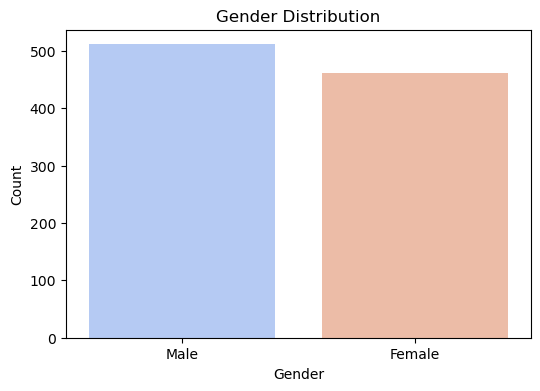

In [59]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### What is the age distribution of gym members?

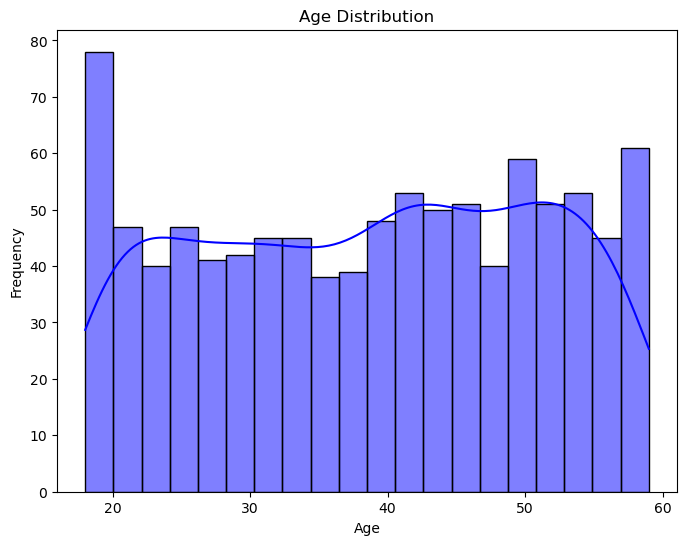

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### What are the most common workout types?

/tmp/ipykernel_13966/1557088382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workout_counts.index, y=workout_counts.values, palette='viridis')


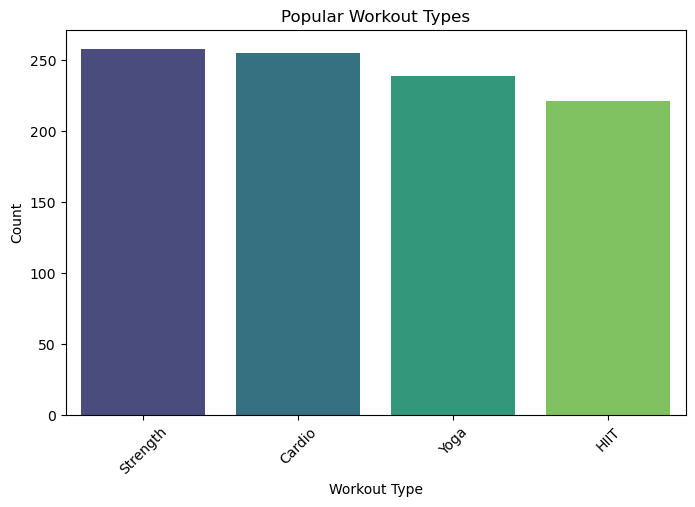

In [63]:
workout_counts = data['Workout_Type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=workout_counts.index, y=workout_counts.values, palette='viridis')
plt.title('Popular Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### How does workout duration affect calories burned?

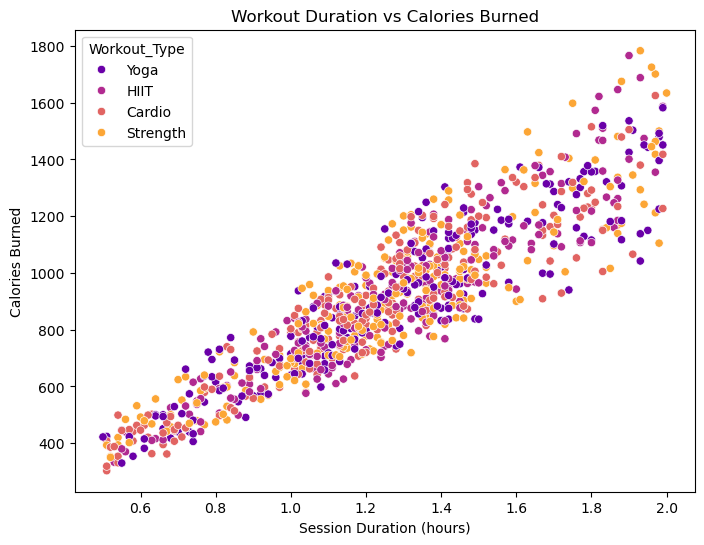

In [65]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', palette='plasma')
plt.title('Workout Duration vs Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()


### What is the correlation between BMI, fat percentage, and calories burned?

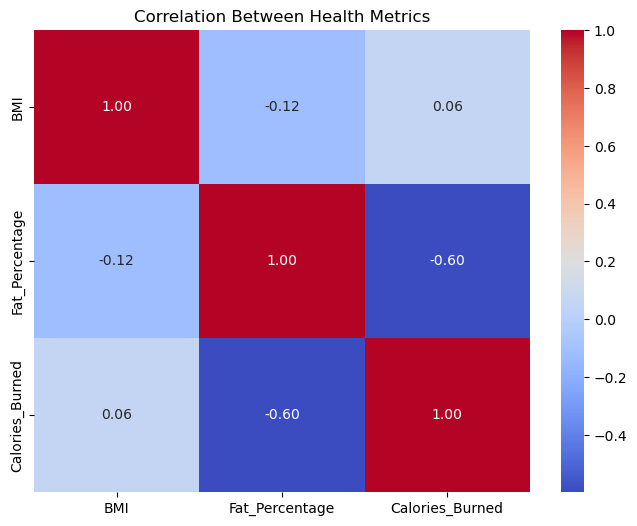

In [67]:
correlation = data[['BMI', 'Fat_Percentage', 'Calories_Burned']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Health Metrics')
plt.show()


## Which Age Group Exercises Most Frequently?

/tmp/ipykernel_13966/1248936984.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_freq = data.groupby('Age_Group')['Workout_Frequency (days/week)'].mean().reset_index()
/tmp/ipykernel_13966/1248936984.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_freq, x='Age_Group', y='Workout_Frequency (days/week)', palette='rocket')


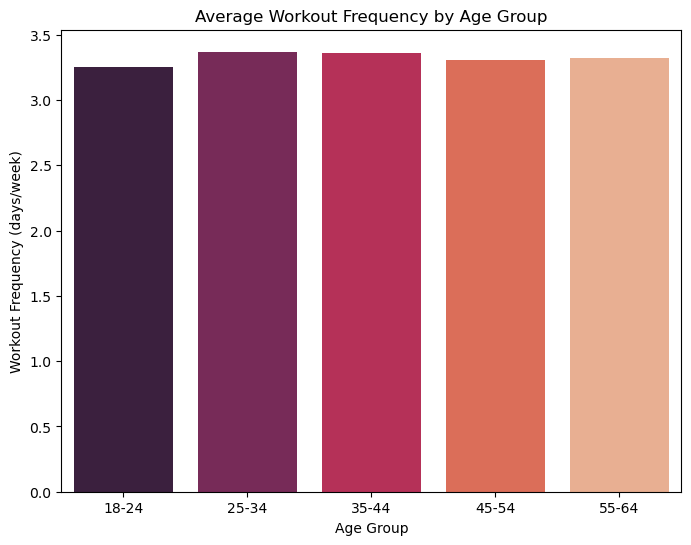

In [69]:
# Define age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate mean workout frequency for each age group
age_group_freq = data.groupby('Age_Group')['Workout_Frequency (days/week)'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_freq, x='Age_Group', y='Workout_Frequency (days/week)', palette='rocket')
plt.title('Average Workout Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Workout Frequency (days/week)')
plt.show()


##  What is the Distribution of Workout Durations by Workout Type?

/tmp/ipykernel_13966/2427605316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Workout_Type', y='Session_Duration (hours)', palette='Set2')


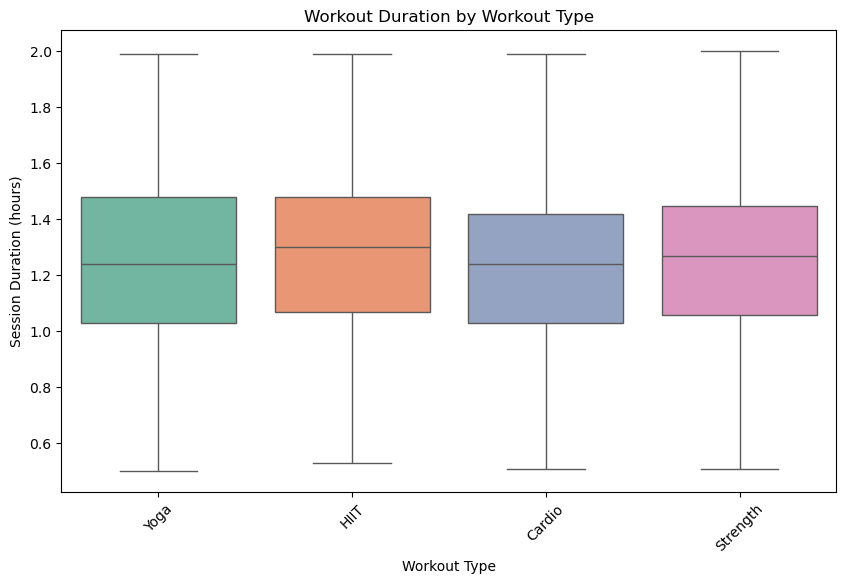

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Workout_Type', y='Session_Duration (hours)', palette='Set2')
plt.title('Workout Duration by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.xticks(rotation=45)
plt.show()


## How Does Heart Rate Change by Experience Level?

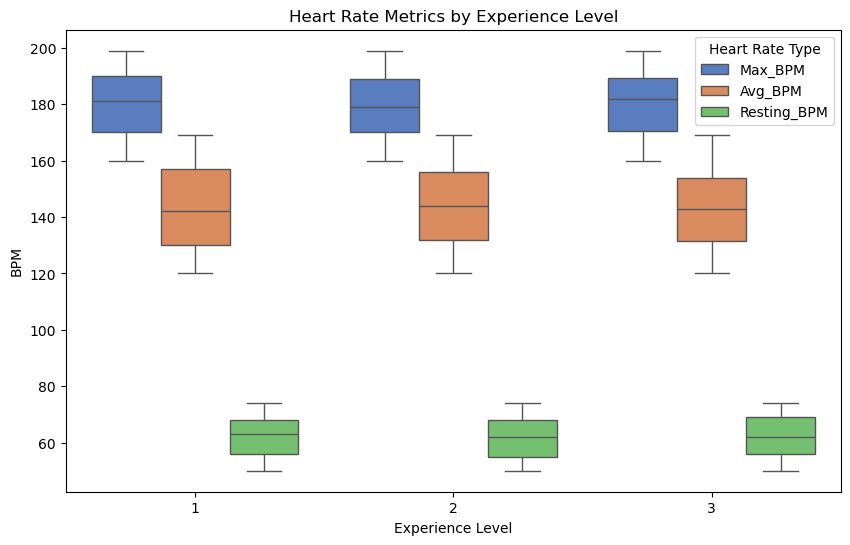

In [73]:
# Prepare data for boxplot
heart_rate_data = data.melt(
    id_vars=['Experience_Level'], 
    value_vars=['Max_BPM', 'Avg_BPM', 'Resting_BPM'], 
    var_name='Heart_Rate_Type', 
    value_name='BPM'
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_rate_data, x='Experience_Level', y='BPM', hue='Heart_Rate_Type', palette='muted')
plt.title('Heart Rate Metrics by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('BPM')
plt.legend(title='Heart Rate Type', loc='upper right')
plt.show()


## What is the Relationship Between Fat Percentage and Calories Burned?

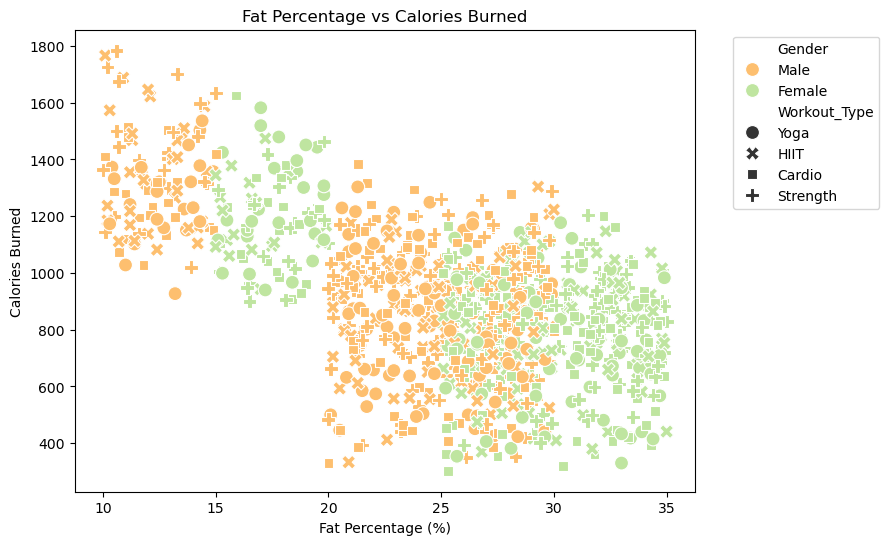

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Fat_Percentage', y='Calories_Burned', hue='Gender', style='Workout_Type', palette='Spectral', s=100)
plt.title('Fat Percentage vs Calories Burned')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('Calories Burned')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##  What is the Weekly Water Intake Distribution?

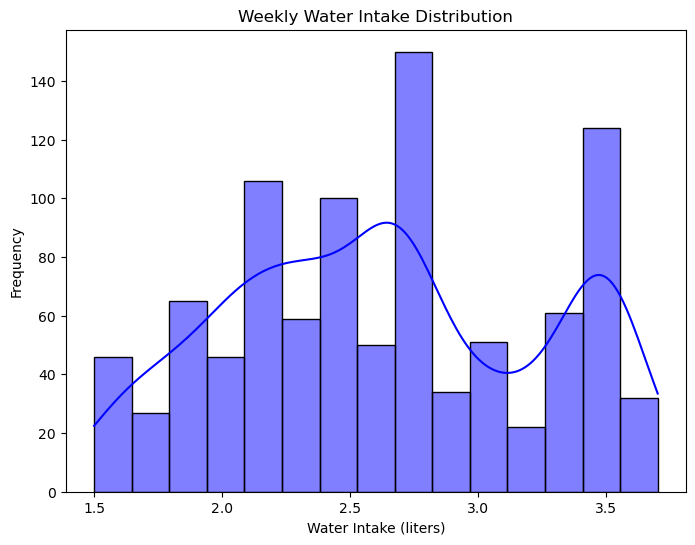

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Water_Intake (liters)'], bins=15, kde=True, color='blue')
plt.title('Weekly Water Intake Distribution')
plt.xlabel('Water Intake (liters)')
plt.ylabel('Frequency')
plt.show()


## Does BMI Vary Across Workout Frequency?

/tmp/ipykernel_13966/4092112738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Workout_Frequency (days/week)', y='BMI', palette='cool')


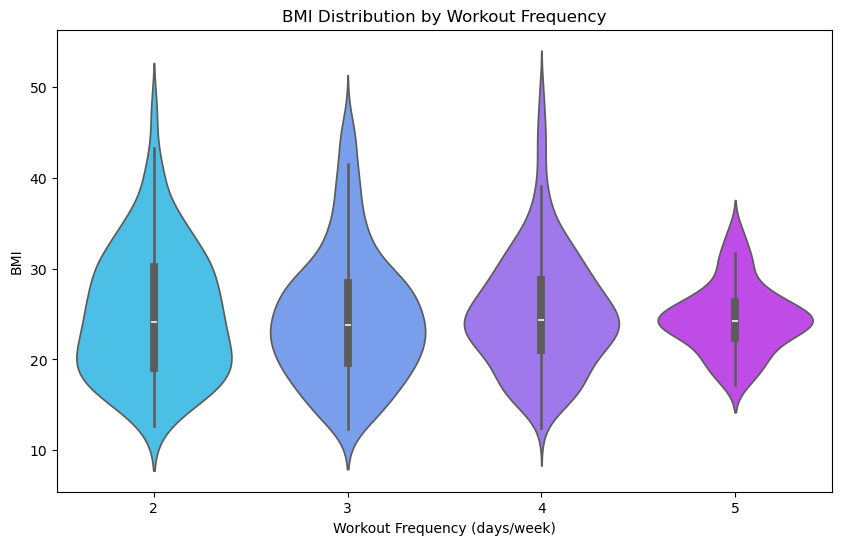

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Workout_Frequency (days/week)', y='BMI', palette='cool')
plt.title('BMI Distribution by Workout Frequency')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.show()


## How Does Water Intake Change With Experience Level?

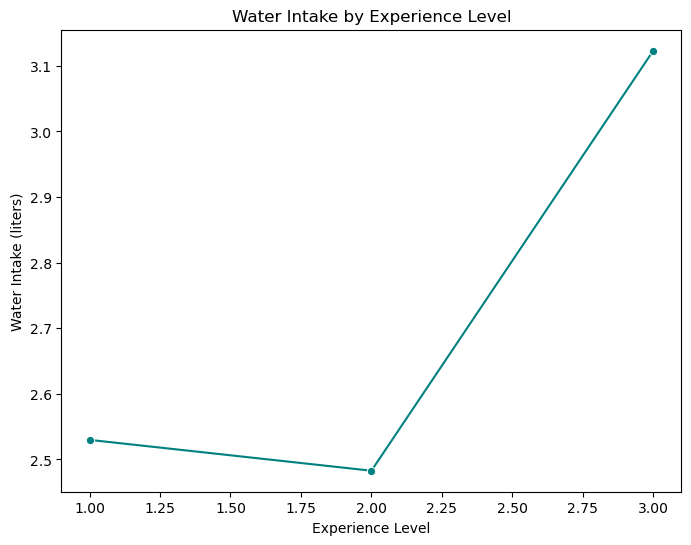

In [81]:
water_experience = data.groupby('Experience_Level')['Water_Intake (liters)'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(data=water_experience, x='Experience_Level', y='Water_Intake (liters)', marker='o', color='teal')
plt.title('Water Intake by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Water Intake (liters)')
plt.show()
